In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
im = cv2.imread("effects/spec2.png", -1)

In [3]:
imHeight, imWidth = im.shape[0], im.shape[1]
centreX, centreY = imWidth//2, imHeight//2
centreY, centreX

(145, 417)

In [13]:
rotationMat = cv2.getRotationMatrix2D(
    center=(centreX, centreY),
    angle=5,
    scale=1
)
rotationMat

array([[  0.9961947 ,   0.08715574, -11.0507718 ],
       [ -0.08715574,   0.9961947 ,  36.8957135 ]])

In [14]:
cos = np.abs(rotationMat[0][0])
sin = np.abs(rotationMat[1][0])
cos, sin

(0.9961946980917455, 0.08715574274765817)

In [15]:
newWidth = int((imHeight * sin) + (imWidth * cos))
newHeight = int((imHeight * cos) + (imWidth * sin))
newHeight, newWidth, im.shape

(362, 857, (291, 835, 4))

In [16]:
rotationMat[0][2] = 0
rotationMat[1][2] += newHeight/2 - centreY
rotationMat

array([[ 0.9961947 ,  0.08715574,  0.        ],
       [-0.08715574,  0.9961947 , 72.8957135 ]])

In [41]:
dst_mat = np.zeros((newHeight, newWidth, 4), np.uint8)
dst_mat = np.full((newHeight, newWidth, 4), [255, 255, 255, 0])
rotatedMat = cv2.warpAffine(
    im,
    rotationMat,
    (newWidth, newHeight),
    np.ascontiguousarray(dst_mat, np.uint8),
    borderMode = cv2.BORDER_TRANSPARENT
)

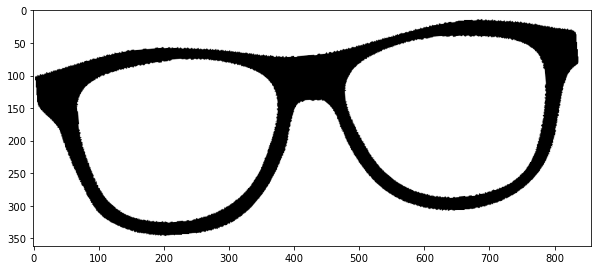

In [42]:
plt.figure(figsize=(10, 10))
plt.imshow(rotatedMat)

In [43]:
cv2.imshow("im", rotatedMat)
if cv2.waitKey(0) == 27:
    cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x55bb094b4df0) is not the object's thread (0x55bb09e6de40).
Cannot move to target thread (0x55bb094b4df0)

QObject::moveToThread: Current thread (0x55bb094b4df0) is not the object's thread (0x55bb09e6de40).
Cannot move to target thread (0x55bb094b4df0)

QObject::moveToThread: Current thread (0x55bb094b4df0) is not the object's thread (0x55bb09e6de40).
Cannot move to target thread (0x55bb094b4df0)

QObject::moveToThread: Current thread (0x55bb094b4df0) is not the object's thread (0x55bb09e6de40).
Cannot move to target thread (0x55bb094b4df0)

QObject::moveToThread: Current thread (0x55bb094b4df0) is not the object's thread (0x55bb09e6de40).
Cannot move to target thread (0x55bb094b4df0)

QObject::moveToThread: Current thread (0x55bb094b4df0) is not the object's thread (0x55bb09e6de40).
Cannot move to target thread (0x55bb094b4df0)

QObject::moveToThread: Current thread (0x55bb094b4df0) is not the object's thread (0x55bb09e6de40).
Cannot move to tar

In [45]:
cv2.imwrite("images/test_file.png", rotatedMat)

True